In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../datos/api_rent_madrid.csv", sep=";")

In [3]:
df.columns

Index(['propertyCode', 'numPhotos', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'country', 'latitude', 'longitude', 'showAddress',
       'distance', 'description', 'hasVideo', 'status', 'newDevelopment',
       'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour',
       'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment',
       'externalReference', 'floor', 'district', 'neighborhood', 'hasLift',
       'parkingSpace', 'labels', 'newDevelopmentFinished'],
      dtype='object')

In [4]:
df["operation"].unique()

array(['rent'], dtype=object)

### Empiezo decidiendo que columnas NO tienen lugar en mi analisis
- Tras el analisis de los datos, he decidido no incluir las siguientes columnas: `hasVideo`, `has3DTour`, `superTopHighlight` , `topNewDevelopment`, `numPhotos` y `description`

In [6]:
columnas_a_eliminar = ['has3DTour', 'superTopHighlight', 'topNewDevelopment', 'numPhotos', 'description']

df_interesante = df.drop(columns=columnas_a_eliminar)

### Ahora, quiero separar las propiedades por provincia, ya que el comportamiento de los mercados son diferentes en las diferentes provincias.

In [5]:
df["province"].unique()

array(['Toledo', 'Madrid', 'Guadalajara', 'Segovia', 'Ávila'],
      dtype=object)

In [16]:
df_madrid = pd.DataFrame()
df_guadalajara = pd.DataFrame()
df_toledo = pd.DataFrame()
df_segovia = pd.DataFrame()
df_avila = pd.DataFrame()

for index, row in df_interesante.iterrows():
    if row['province'] == 'Madrid':
        df_madrid = pd.concat([df_madrid, pd.DataFrame([row])], ignore_index=True)
    elif row['province'] == 'Guadalajara':
        df_guadalajara = pd.concat([df_guadalajara, pd.DataFrame([row])], ignore_index=True)
    elif row['province'] == 'Toledo':
        df_toledo = pd.concat([df_toledo, pd.DataFrame([row])], ignore_index=True)
    elif row['province'] == 'Segovia':
        df_segovia = pd.concat([df_segovia, pd.DataFrame([row])], ignore_index=True)
    elif row['province'] == 'Ávila':
        df_avila = pd.concat([df_avila, pd.DataFrame([row])], ignore_index=True)

print(f"df_madrid tiene {df_madrid.shape[0]} filas")
print(f"df_guadalajara tiene {df_guadalajara.shape[0]} filas")
print(f"df_toledo tiene {df_toledo.shape[0]} filas")
print(f"df_segovia tiene {df_segovia.shape[0]} filas")
print(f"df_avila tiene {df_avila.shape[0]} filas")


df_madrid tiene 358 filas
df_guadalajara tiene 21 filas
df_toledo tiene 62 filas
df_segovia tiene 8 filas
df_avila tiene 1 filas


### Identificamos donde tengo la mayor concentración de nulos

In [ ]:
dataframes = {
    "df_madrid": df_madrid,
    "df_guadalajara": df_guadalajara,
    "df_toledo": df_toledo,
    "df_segovia": df_segovia,
    "df_avila": df_avila,
}

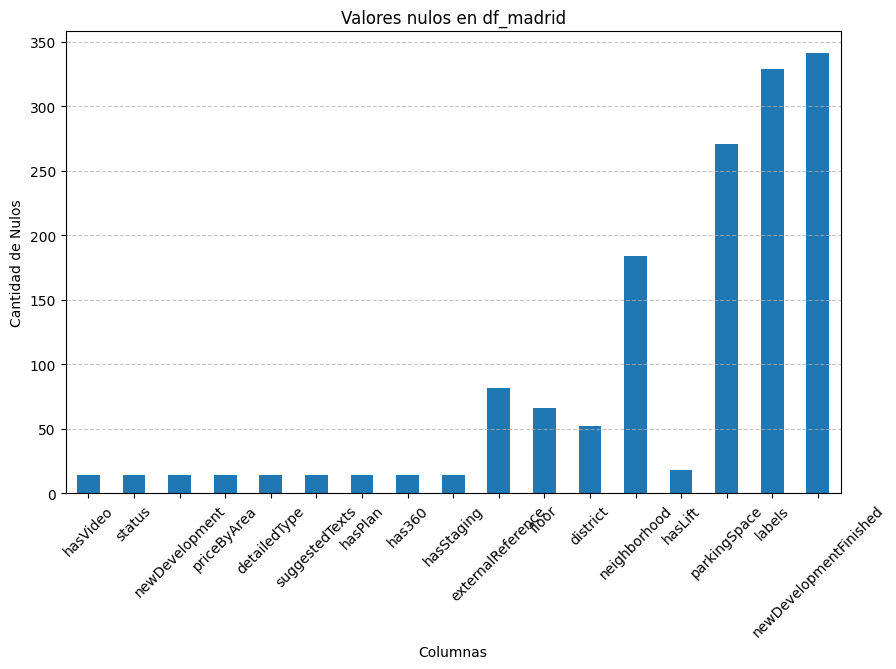

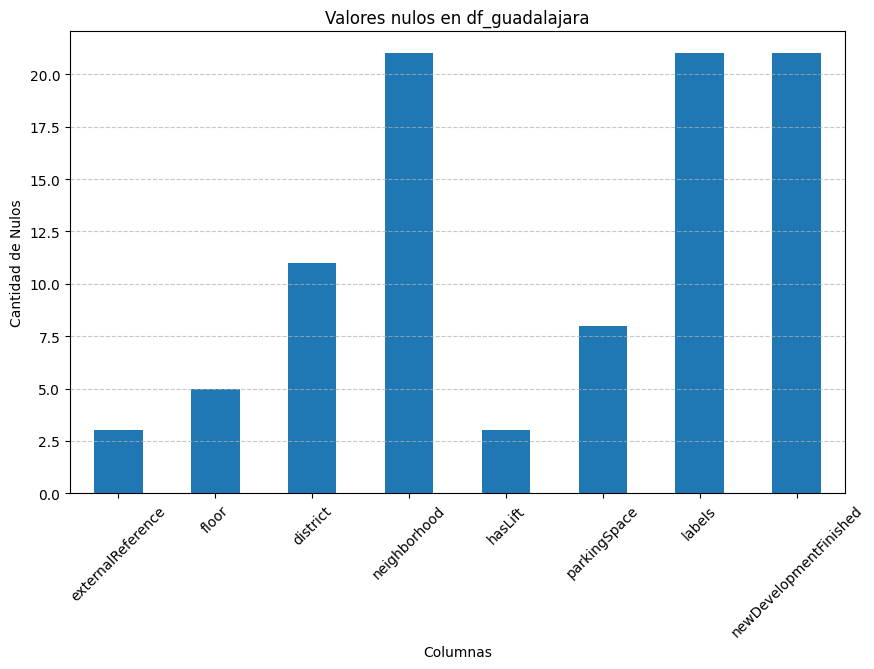

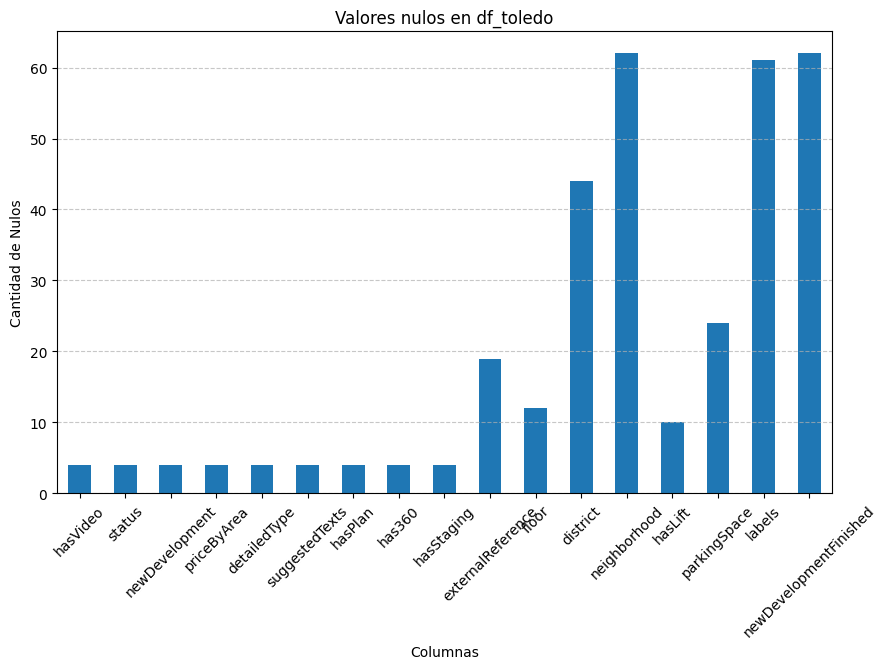

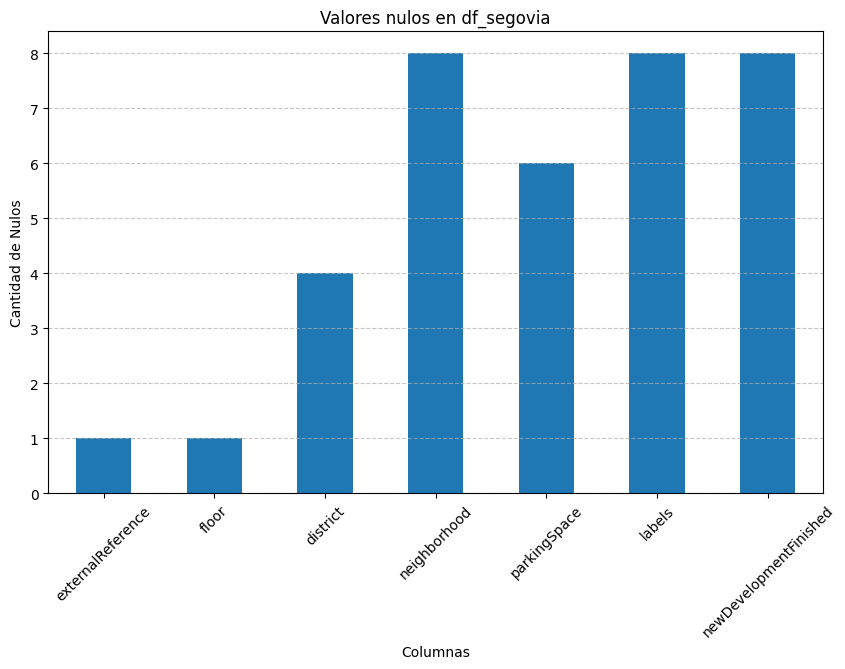

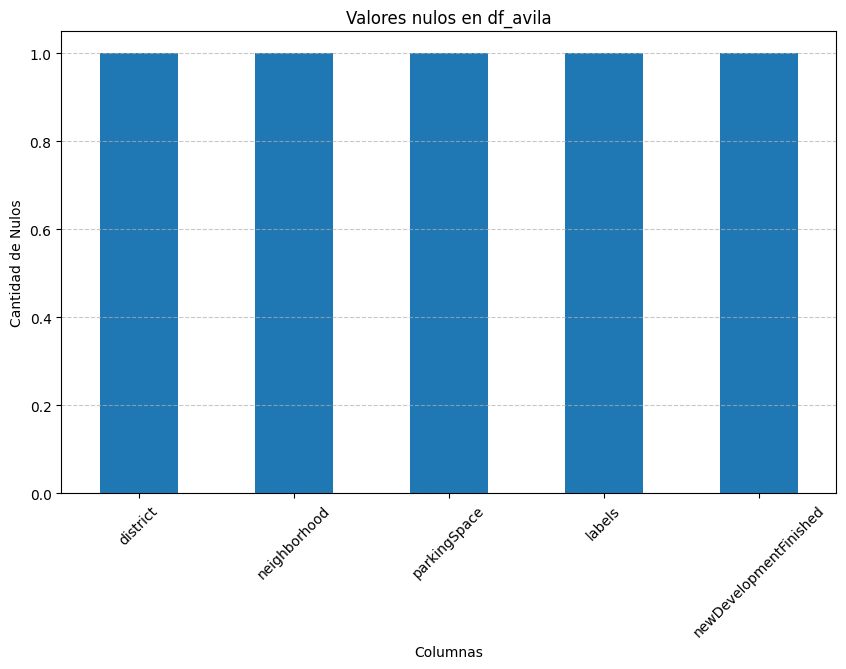

In [24]:

for nombre, df in dataframes.items():
    nulos = df.isnull().sum()
    nulos = nulos[nulos > 0]  # Filtrar solo columnas con nulos

    if not nulos.empty:  # Solo graficar si hay columnas con nulos
        plt.figure(figsize=(10, 6))
        nulos.plot(kind='bar', title=f"Valores nulos en {nombre}", xlabel='Columnas', ylabel='Cantidad de Nulos')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
